## Does the following:
-  Simulate data, store in RECOVAR format
- Load data and ground truth from file
- Attempt to solve with CG


In [31]:
import recovar.config
from importlib import reload
import numpy as np
from cryodrgn import analysis
from cryodrgn import utils
from cryodrgn import ctf
from recovar import plot_utils
from recovar import output, dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
from recovar import simulator
reload(simulator)
import jax
import warnings
# warnings.filterwarnings("error")

grid_size = 256
output_folder = f"/home/mg6942/mytigress/spike{grid_size}_ewald/"
volume_folder_input =  f"/home/wonjaec/mytigress/spike{grid_size}/"
outlier_file_input = None# "/home/wonjaec/mytigress/simulated_empiar10180/volumes/vol0915.mrc"
n_images = 10000
voxel_size = 10 * 128 / grid_size#3/2/2
output.mkdir_safe(output_folder)
volume_distribution = np.zeros(1)
first_k = 1
volume_distribution[:first_k] = 1/first_k
image_stack, sim_info = simulator.generate_synthetic_dataset(output_folder, voxel_size, volume_folder_input,  n_images,
                                                             outlier_file_input,  grid_size = grid_size,
                               volume_distribution = volume_distribution,  dataset_params_option = "dataset1", noise_level =1e-1, 
                               noise_model = "white", put_extra_particles = False, percent_outliers = 0.0, 
                               volume_radius = 0.6, trailing_zero_format_in_vol_name = True, noise_scale_std = 0.2 * 0, contrast_std =0.1 * 0 , disc_type = 'ewald_nearest')

(INFO) (simulator.py) (24-Jul-24 12:16:48) Loading volume 0
(INFO) (ctf.py) (24-Jul-24 12:16:49) Image size (pix)  : 256
(INFO) (ctf.py) (24-Jul-24 12:16:49) A/pix             : 1.6375000476837158
(INFO) (ctf.py) (24-Jul-24 12:16:49) DefocusU (A)      : 15301.099609375
(INFO) (ctf.py) (24-Jul-24 12:16:49) DefocusV (A)      : 14916.400390625
(INFO) (ctf.py) (24-Jul-24 12:16:49) Dfang (deg)       : 5.28000020980835
(INFO) (ctf.py) (24-Jul-24 12:16:49) voltage (kV)      : 300.0
(INFO) (ctf.py) (24-Jul-24 12:16:49) cs (mm)           : 2.700000047683716
(INFO) (ctf.py) (24-Jul-24 12:16:49) w                 : 0.07000000029802322
(INFO) (ctf.py) (24-Jul-24 12:16:49) Phase shift (deg) : 0.0
(INFO) (simulator.py) (24-Jul-24 12:16:52) Batch 0: Generated 10 images so far
(INFO) (simulator.py) (24-Jul-24 12:16:52) Discretizing with: ewald_nearest
(INFO) (simulator.py) (24-Jul-24 12:16:52) Done generating data
(INFO) (ctf.py) (24-Jul-24 12:16:52) Image size (pix)  : 256
(INFO) (ctf.py) (24-Jul-24 

(INFO) (ctf.py) (24-Jul-24 12:17:05) Image size (pix)  : 256
(INFO) (ctf.py) (24-Jul-24 12:17:05) A/pix             : 5.0
(INFO) (ctf.py) (24-Jul-24 12:17:05) DefocusU (A)      : 17557.599609375
(INFO) (ctf.py) (24-Jul-24 12:17:05) DefocusV (A)      : 17926.900390625
(INFO) (ctf.py) (24-Jul-24 12:17:05) Dfang (deg)       : 73.66000366210938
(INFO) (ctf.py) (24-Jul-24 12:17:05) voltage (kV)      : 300.0
(INFO) (ctf.py) (24-Jul-24 12:17:05) cs (mm)           : 2.700000047683716
(INFO) (ctf.py) (24-Jul-24 12:17:05) w                 : 0.0
(INFO) (ctf.py) (24-Jul-24 12:17:05) Phase shift (deg) : 4.013987064361572
n images 10000


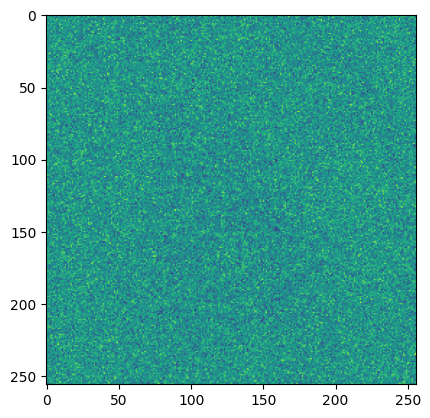

In [32]:
plt.imshow(image_stack[0])

# output_folder = f"/home/wonjaec/mytigress/spike{grid_size}_ewald/"
# output_folder ='/home/mg6942/mytigress/spike256/../'
volume_folder_input =  f"/home/wonjaec/mytigress/spike{grid_size}/"
outlier_file_input = "/home/wonjaec/mytigress/simulated_empiar10180/volumes/vol0915.mrc"
dataset_dict = dataset.get_default_dataset_option()

# Fill these options with the path to preprocessed files
experiment_directory = '/home/wonjaec/mytigress/uniform/'
dataset_dict['ctf_file'] = output_folder + "ctf.pkl"
dataset_dict['poses_file'] = output_folder + "poses.pkl"
dataset_dict['particles_file'] = f"{output_folder}particles.{grid_size}.mrcs"


# Returns an object that knows everything about the dataset.
cryo = dataset.load_dataset_from_dict(dataset_dict, lazy = False)
print("n images", cryo.n_images)
del dataset_dict['ind']

In [33]:
# cryo = dataset.load_cryodrgn_dataset( f"{output_folder}particles.{grid_size}.mrcs", output_folder + "poses.pkl", output_folder + "ctf.pkl", lazy = False)
from recovar import regularization, synthetic_dataset, noise, homogeneous, utils
sim_info = recovar.utils.pickle_load(output_folder + '/simulation_info.pkl')
gt_recon = synthetic_dataset.load_heterogeneous_reconstruction(sim_info, volumes_path_root = None)
gt_vol =gt_recon.get_mean()
noise_variance = sim_info['noise_variance']
signal_variance = utils.make_radial_image(regularization.average_over_shells(np.abs(gt_vol)**2, cryo.volume_shape), cryo.volume_shape)


(INFO) (simulator.py) (24-Jul-24 12:17:05) Loading volume 0


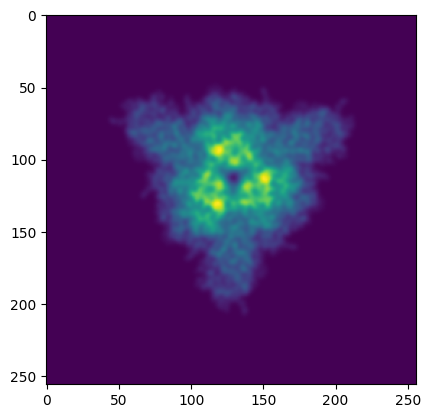

In [34]:
from recovar import core, utils, fourier_transform_utils
ftu = fourier_transform_utils.fourier_transform_utils(jax.numpy)

vol = gt_vol.reshape(cryo.volume_shape)
vol_1 = ftu.get_idft3(vol)
plt.imshow(np.sum(vol_1, axis=2).real)


(INFO) (ewald.py) (24-Jul-24 12:17:07) batch size in second order: 500
(WARNING) (homogeneous.py) (24-Jul-24 12:17:16) TOOK OUT IMAGE MASK IN MEAN!!! PUT IT BACK??
1.7570848516325364e-08
1.000016627516047
17155409


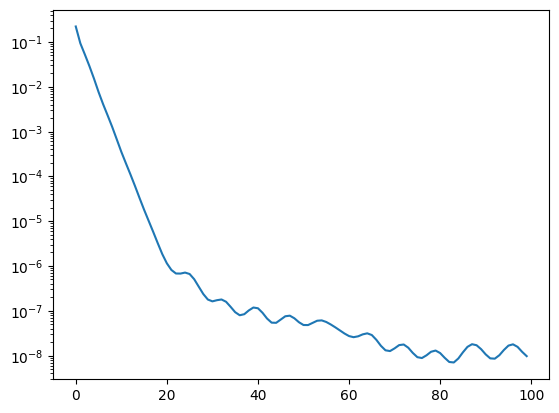

In [35]:
from recovar import ewald
reload(ewald)

batch_size = 500
x1, residuals = ewald.solve_ewald_least_squares(cryo, batch_size, "nearest", signal_variance, noise_variance.astype(np.float32))
plt.semilogy(residuals)

In [43]:
volume_real, volume_imag = ewald.unvec_masked(x1, cryo.volume_shape, mask_size)
vol = ftu.get_idft3((volume_real + 1j * volume_imag).reshape(volume_shape))#.real

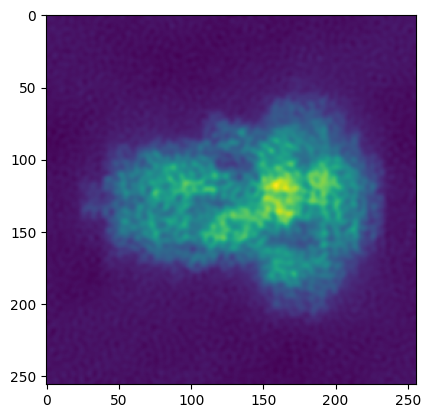

In [46]:
plt.imshow(vol.sum(axis=0).real)

<Axes: >

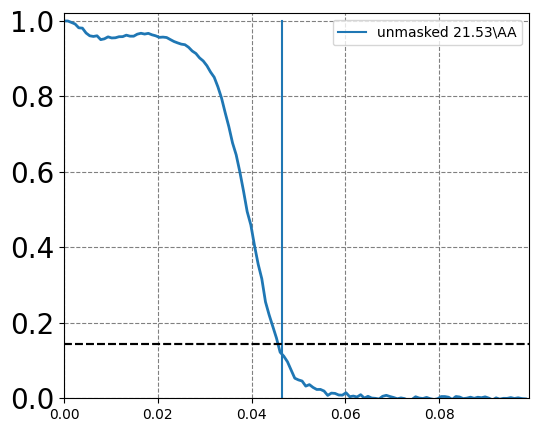

In [49]:
from recovar import plot_utils
plot_utils.plot_fsc(cryo, gt_vol, ftu.get_dft3(vol))

In [36]:
noise_image_variance = noise.make_radial_noise(noise_variance, cryo.image_shape)
diag_mean, _ = homogeneous.solve_least_squares_mean_iteration(cryo , None, noise_image_variance,  batch_size, None, disc_type = "nearest", return_lhs_rhs = True )
diag_mean = diag_mean.reshape(-1)
print(diag_mean.shape)
print(gt_vol.shape)

# plt.imshow(np.abs(np.diag(diag_mean)) > 0)

gt_vol


(WARNING) (homogeneous.py) (24-Jul-24 12:18:31) TOOK OUT IMAGE MASK IN MEAN!!! PUT IT BACK??
(16777216,)
(16777216,)


array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
      dtype=complex64)

In [37]:
cryo.n_images

10000

In [38]:
(np.random.randn(*gt_vol.shape)).shape

(16777216,)

In [39]:
from recovar import mask
import jax.numpy as jnp
import scipy.sparse
import inspect
reload(ewald)
volume_shape = tuple(3*[grid_size])
mask_real = mask.get_radial_mask(cryo.volume_shape).reshape(-1)
mask_size = int(jnp.sum(mask_real))
# gt_vol = ftu.get_dft3(np.random.randn(*volume_shape)).reshape(-1) * cryo.get_valid_frequency_indices()# + 1j * np.random.randn(*gt_vol.shape) 

gt_vol = ftu.get_dft3(np.random.randn(*experiment_dataset.volume_shape)).reshape(-1) * experiment_dataset.get_valid_frequency_indices(29) # + 1j * np.random.randn(experiment_dataset.volume_size)


NameError: name 'experiment_dataset' is not defined

In [ ]:
masked_vol = ewald.vec_masked(gt_vol.real, gt_vol.imag, cryo.volume_shape)

y_ewald_temp = ewald.matvec_experiments(masked_vol, cryo, batch_size, "nearest", signal_variance, noise_variance)
y_ewald_r, y_ewald_i = ewald.unvec_masked(y_ewald_temp, cryo.volume_shape, mask_size)
y_ewald = y_ewald_r + y_ewald_i * 1j

diag_mean_masked = ewald.vec_masked(diag_mean.real, diag_mean.real, cryo.volume_shape)

y_planar_temp = diag_mean_masked * masked_vol
y_planar_r, y_planar_i = ewald.unvec_masked(y_planar_temp, cryo.volume_shape, mask_size)
y_planar = y_planar_r + y_planar_i * 1j

In [ ]:
print(y_ewald.shape)
print(y_planar.shape)
print(np.linalg.norm(y_ewald - y_planar) / np.linalg.norm(y_planar))

plt.imshow(np.sum(y_ewald.reshape(cryo.volume_shape), axis=2).real)
plt.figure()
plt.imshow(np.sum(y_planar.reshape(cryo.volume_shape), axis=2).real)

In [ ]:
reload(ewald)
n_images = 1

ctf_params, rotation_matrices, translations = simulator.random_sampling_scheme(n_images, grid_size, seed =0 )
image_shape = (grid_size, grid_size)
volume_shape = (grid_size, grid_size, grid_size)
CTF_fun = cryo.CTF_fun
# lam = ewald.volt_to_wavelength(300)

phase_shift = np.arcsin(ctf_params[:,5]) / np.pi * 180
ctf_params[:,5] = 0
ctf_params[:,6] = phase_shift
# ctf_params[:,:2] = 0 
# ctf_params[:,4] = 0 

# rotation_matrices[0] = np.eye(3)
gt_vol =gt_recon.volumes[0].copy() * cryo.get_valid_frequency_indices(29)

# gt_vol.real=0
# y_inp = np.concatenate([gt_, volume_imag], axis=-1)
A_y_inp = ewald.ewald_sphere_forward_model(gt_vol.real, gt_vol.imag, rotation_matrices, ctf_params, image_shape, volume_shape, voxel_size,'nearest' )
A_y_inp = A_y_inp[0] + A_y_inp[1] * 1j
A_y_planar = core.forward_model_from_map(gt_vol, ctf_params, rotation_matrices, image_shape, volume_shape, voxel_size, CTF_fun,'nearest')

In [ ]:
reload(ewald)
vv = ewald.adjoint_ewald_sphere_forward_model(A_y_inp[0], A_y_inp[1], rotation_matrices, ctf_params, image_shape, volume_shape, voxel_size, 'nearest' )
vv2 = vv[0] + vv[1]*1j


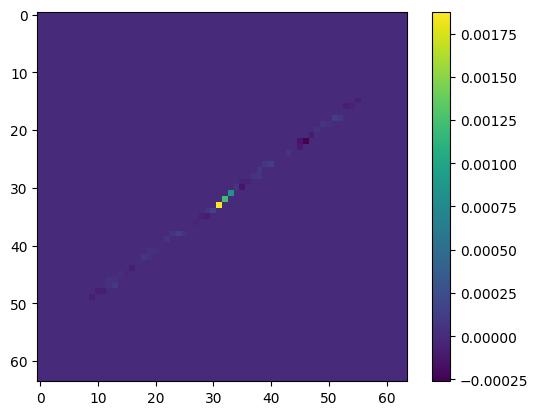

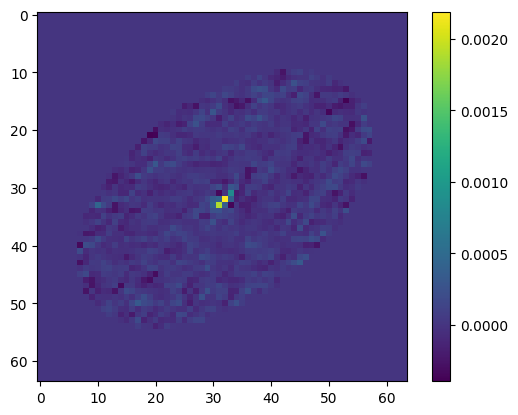

In [50]:
plt.figure()
plt.imshow(vv2.reshape(volume_shape)[32].real)
plt.colorbar()

plt.figure()
plt.imshow(vv2.reshape(volume_shape).sum(axis=0).real)
plt.colorbar()

In [51]:
np.dot(np.conj(gt_vol), vv2).real + np.dot(np.conj(gt_vol), vv2).imag

0.0014056826

In [52]:
np.dot(np.conj(A_y_inp.reshape(-1)), A_y_inp.reshape(-1))

(0.001405682+0j)

In [53]:
# np.linalg.norm(A_y_planar - A_y_inp) / np.linalg.norm(A_y_planar)

In [54]:
gt_vol2 = gt_vol# ftu.get_dft3(np.random.randn(*volume_shape)).reshape(-1) * cryo.get_valid_frequency_indices()

6.0697175e-06


<Figure size 640x480 with 0 Axes>

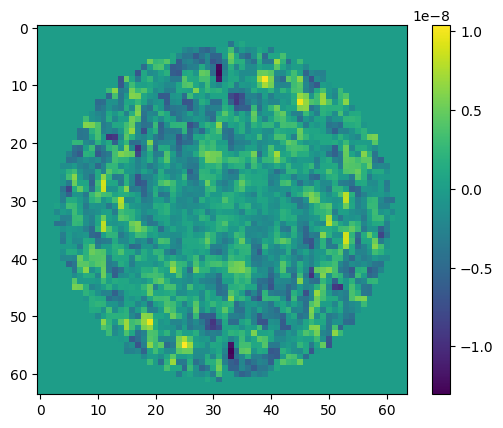

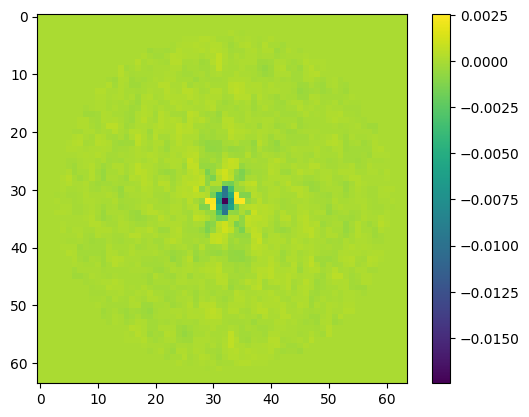

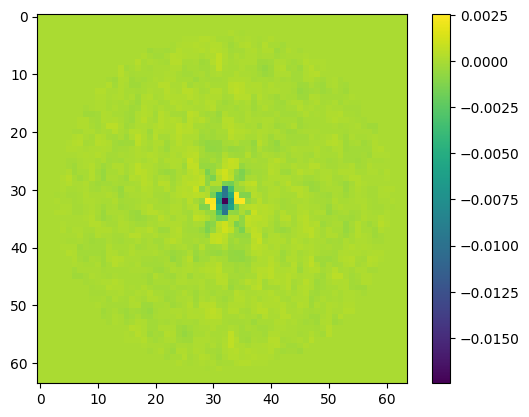

<Figure size 640x480 with 0 Axes>

In [55]:
plt.imshow((A_y_inp.reshape(image_shape) - A_y_planar.real.reshape(image_shape)).real)
plt.colorbar()
plt.figure()
print(np.linalg.norm(A_y_planar - A_y_inp) / np.linalg.norm(A_y_planar))

plt.imshow((A_y_inp.reshape(image_shape).real ))#[32])
plt.colorbar()
plt.figure()

plt.imshow((A_y_planar.real.reshape(image_shape).real))#[32])
plt.colorbar()
plt.figure()

# plt.imshow(V1_real.real.reshape(image_shape))
# plt.colorbar()

In [56]:
disc_type ='nearest'
reload(ewald)
V1_real, V1_imag = ewald.compute_A_t_Av_ewald_sphere_forward_model(gt_vol.real, gt_vol.imag, rotation_matrices, ctf_params, 1, image_shape, volume_shape, voxel_size, disc_type)

In [68]:
experiment_dataset = cryo
diag = core.compute_A_t_Av_forward_model_from_map(np.ones_like(gt_vol), ctf_params, rotation_matrices,
                                           experiment_dataset.image_shape, experiment_dataset.volume_shape, experiment_dataset.voxel_size,
                                           experiment_dataset.CTF_fun, disc_type)

# V2 = V2[0]

V2 = gt_vol * diag[0]



In [69]:
A_y_planar2 = core.forward_model_from_map(gt_vol2, ctf_params, rotation_matrices, image_shape, volume_shape, voxel_size, CTF_fun,'nearest')

In [70]:
A_y_planar = A_y_planar.reshape(-1)
A_y_planar2 = A_y_planar2.reshape(-1)

In [71]:
# np.linalg.norm(A_y_planar)**2
np.dot(np.conj(A_y_planar2), A_y_planar)

(0.0014056896+0j)

In [72]:
np.dot(np.conj(V2), (gt_vol2))

(0.0014056897+9.549694e-12j)

In [73]:
np.dot(V1_real, gt_vol2.real) + np.dot(V1_imag, gt_vol2.imag)

0.0014056824

In [74]:
np.dot(np.conj(V1_real + 1j* V1_imag) , (gt_vol2))

(0.0014056825-2.8649083e-11j)

In [75]:
np.linalg.norm(X3.real - X4.real)  / np.linalg.norm(X3.real)

2.7479367e-05

In [76]:
np.linalg.norm(X3 - X4) / np.linalg.norm(X3)

2.7479797e-05

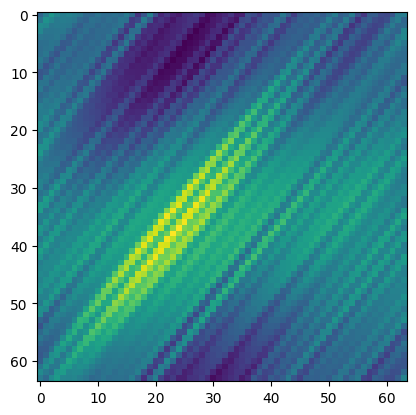

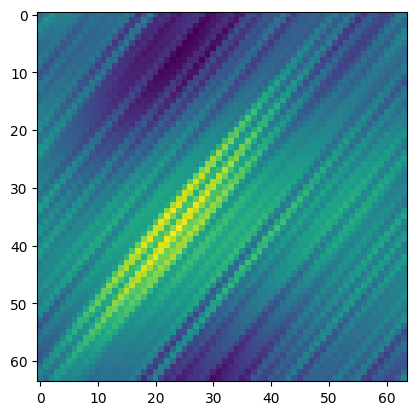

In [77]:
X3 = V1_real + 1j * V1_imag
X3 = ftu.get_idft3(X3.reshape(volume_shape))
plt.imshow(X3.sum(axis=1).real)


X4 = V2
X4 = ftu.get_idft3(X4.reshape(volume_shape))
plt.figure()
plt.imshow(X4.sum(axis=1).real)

<Figure size 640x480 with 0 Axes>

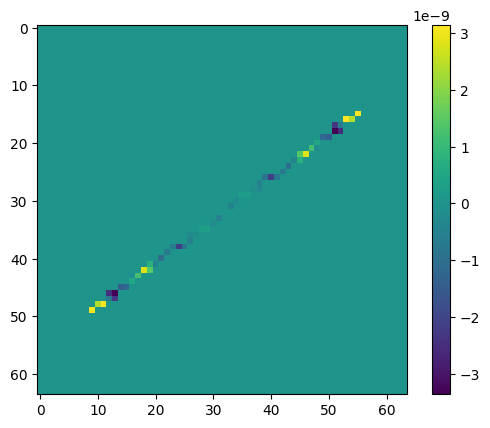

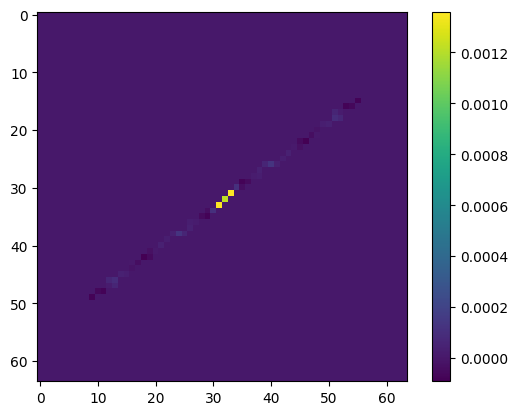

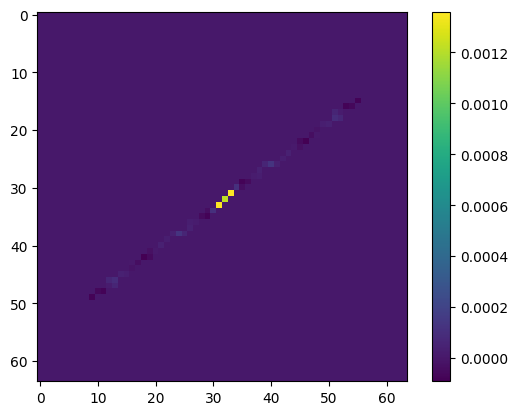

<Figure size 640x480 with 0 Axes>

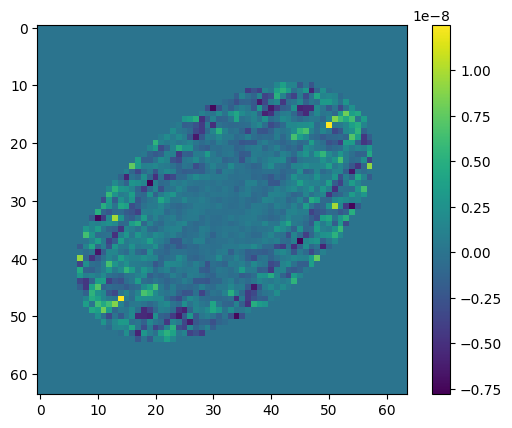

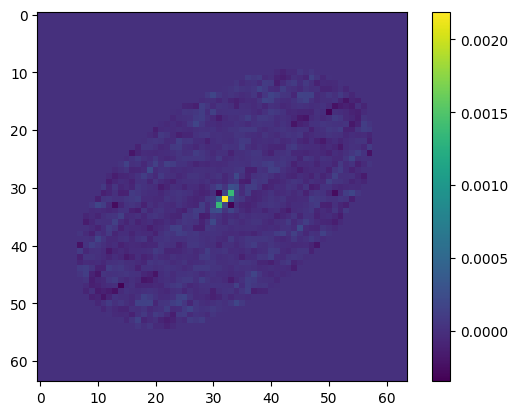

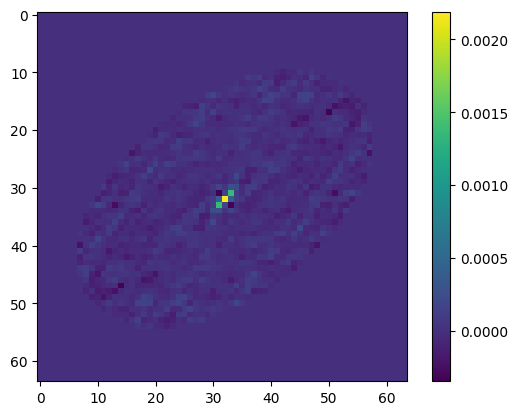

<Figure size 640x480 with 0 Axes>

In [78]:
plt.imshow((V1_real.reshape(volume_shape) - V2.real.reshape(volume_shape))[32])
plt.colorbar()
plt.figure()

plt.imshow((V1_real.reshape(volume_shape) )[32])
plt.colorbar()
plt.figure()

plt.imshow((V2.real.real.reshape(volume_shape))[32])
plt.colorbar()
plt.figure()


plt.figure()
plt.imshow((V1_real.reshape(volume_shape) - V2.real.reshape(volume_shape)).sum(axis=0))
plt.colorbar()
plt.figure()

plt.imshow((V1_real.reshape(volume_shape) ).sum(axis=0))
plt.colorbar()
plt.figure()

plt.imshow((V2.real.real.reshape(volume_shape)).sum(axis=0))
plt.colorbar()
plt.figure()


# plt.imshow(V1_real.real.reshape(image_shape))
# plt.colorbar()

6.0697175e-06


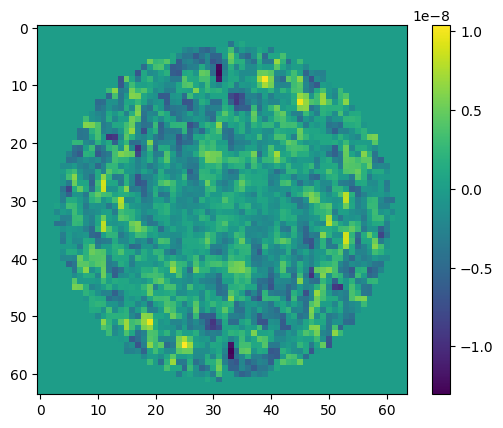

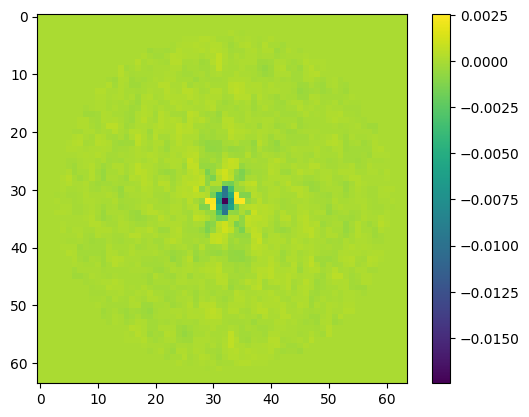

In [79]:
print(np.linalg.norm (A_y_inp - A_y_planar) / np.linalg.norm (A_y_planar))

plt.imshow(A_y_inp.real.reshape(image_shape) - A_y_planar.real.reshape(image_shape))
plt.colorbar()
plt.figure()
plt.imshow(A_y_planar.real.reshape(image_shape))
plt.colorbar()

In [174]:
from recovar import mask
import jax.numpy as jnp
import scipy.sparse
import inspect
reload(ewald)
mask_real = mask.get_radial_mask(cryo.volume_shape).reshape(-1)
mask_size = int(jnp.sum(mask_real))

x1_unvec = ewald.unvec_masked(x1, cryo.volume_shape, mask_size)

NameError: name 'x1' is not defined

In [175]:
x1_unvec = x1_unvec[0] + x1_unvec[1] * 1j
print(x1_unvec.shape)
# x1_unvec = x1_unvec.reshape((cryo.volume_shape))
# final_x1 = ftu.get_idft3(x1_unvec)
# print(final_x1.shape)


NameError: name 'x1_unvec' is not defined

In [42]:
x1_f = x1_unvec.reshape(cryo.volume_shape)

0.6586625197902692


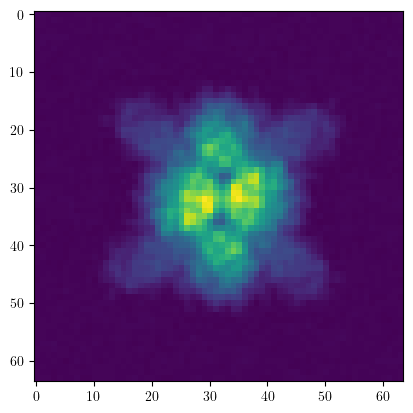

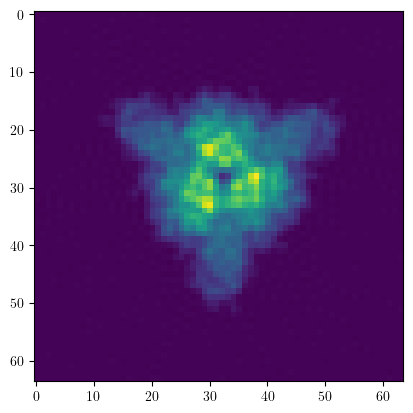

In [43]:
from recovar import core, utils, fourier_transform_utils
ftu = fourier_transform_utils.fourier_transform_utils(jax.numpy)

x1_final = ftu.get_idft3(x1_f)
plt.imshow(np.sum(x1_final, axis=0).real.T)
plt.figure()

true_vol = gt_vol.reshape(cryo.volume_shape)
true_true_vol = ftu.get_idft3(true_vol)
plt.imshow(np.sum(true_true_vol, axis=0).real.T)

print(np.linalg.norm(x1_final - true_true_vol)/np.linalg.norm(x1_final))

In [17]:
def planar_model(dataset):
    noise_variance_image = noise.make_radial_noise(noise_variance, cryo.image_shape)
    diag_mean, _ = homogeneous.solve_least_squares_mean_iteration(dataset , None, noise_variance_image,  batch_size, gt_vol, disc_type = "nearest", return_lhs_rhs = True )
    return diag_mean

noise_variance.shape
dm = planar_model(cryo).reshape(-1)
print(dm.shape)

(WARNING) (homogeneous.py) (10-Jul-24 14:02:54) TOOK OUT IMAGE MASK IN MEAN!!! PUT IT BACK??
(262144,)


TypeError: Invalid shape (1,) for image data

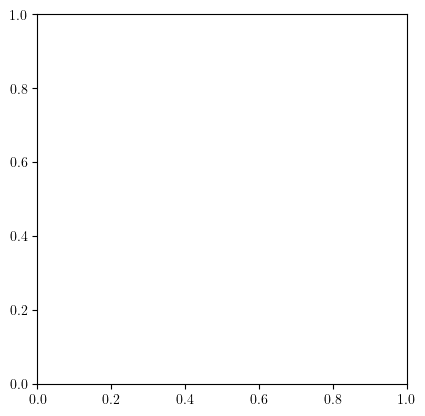

In [54]:
plt.imshow(dm_diag.real)

In [16]:
residuals[-1]

9.285390640884215e-05

In [6]:
batch_size = 100
disc_type = "nearest"

In [7]:
from recovar import mask
import jax.numpy as jnp
import scipy.sparse
import inspect
reload(ewald)

<module 'recovar.ewald' from '/home/wonjaec/recovar/recovar/ewald.py'>

In [8]:
# Linearity Tests

reload(ewald)
mask_real = mask.get_radial_mask(cryo.volume_shape).reshape(-1)
mask_size = int(jnp.sum(mask_real))

x_1 = np.random.rand(mask_size * 2 - 1)
x_2 = np.random.rand(mask_size * 2 - 1)

result1 = ewald.matvec_experiments(x_1, cryo, batch_size, "nearest", signal_variance, noise_variance)
result2 = ewald.matvec_experiments(x_2, cryo, batch_size, "nearest", signal_variance, noise_variance)
result3 = ewald.matvec_experiments(x_1 + x_2, cryo, batch_size, "nearest", signal_variance, noise_variance)

print(np.linalg.norm(result1 + result2 - result3) / np.linalg.norm(result3))

3.6299458746310445e-16


In [9]:
reload(ewald)
from recovar import core, utils, fourier_transform_utils
ftu = fourier_transform_utils.fourier_transform_utils(jax.numpy)
vol_spatial_mask = mask.get_radial_mask(tuple(3*[grid_size]))#, radius = grid_size-2)


vol = gt_vol.reshape((grid_size, grid_size, grid_size))
# vol = ftu.get_idft3(gt_vol.reshape((16, 16, 16)))
vol *= vol_spatial_mask 
volume_real = vol.real.reshape(-1)
volume_imag = vol.imag.reshape(-1)

n_images = 1

ctf_params, rotation_matrices, translations = simulator.random_sampling_scheme(n_images, grid_size, seed =0 )
image_shape = (grid_size, grid_size)
volume_shape = (grid_size, grid_size, grid_size)
# lam = ewald.volt_to_wavelength(300)

y_inp = np.concatenate([volume_real, volume_imag], axis=-1)
A_y_inp = ewald.ewald_sphere_forward_model(volume_real, volume_imag, rotation_matrices, ctf_params, image_shape, volume_shape, voxel_size,'nearest_neighbor' )
A_y_inp_vec = np.concatenate(A_y_inp, axis=-1).reshape(-1)

x = A_y_inp
im_mask = mask.get_radial_mask(tuple(2*[grid_size])).reshape(-1)
test_x = [ np.random.randn(*x[0].shape) * im_mask, np.random.randn(*x[1].shape)* im_mask]
test_x_vec = np.concatenate(test_x, axis=-1).reshape(-1)

At_test_x = ewald.adjoint_ewald_sphere_forward_model(test_x[0], test_x[1], rotation_matrices, ctf_params, image_shape, volume_shape, voxel_size, 'nearest_neighbor' )
At_test_x_vec = np.concatenate(At_test_x, axis=-1)

print(np.dot(test_x_vec, A_y_inp_vec))
print(np.dot(At_test_x_vec, y_inp))

# If adjoint is correct, then < x , Ay > === < A^T x, y >
print('rel error: ', np.abs(np.dot(test_x_vec, A_y_inp_vec) - np.dot(At_test_x_vec, y_inp)) / np.abs(np.dot(At_test_x_vec, y_inp)))


(INFO) (ctf.py) (22-Apr-24 14:15:57) Image size (pix)  : 16
(INFO) (ctf.py) (22-Apr-24 14:15:57) A/pix             : 26.200000762939453
(INFO) (ctf.py) (22-Apr-24 14:15:57) DefocusU (A)      : 15301.099609375
(INFO) (ctf.py) (22-Apr-24 14:15:57) DefocusV (A)      : 14916.400390625
(INFO) (ctf.py) (22-Apr-24 14:15:57) Dfang (deg)       : 5.28000020980835
(INFO) (ctf.py) (22-Apr-24 14:15:57) voltage (kV)      : 300.0
(INFO) (ctf.py) (22-Apr-24 14:15:57) cs (mm)           : 2.700000047683716
(INFO) (ctf.py) (22-Apr-24 14:15:57) w                 : 0.07000000029802322
(INFO) (ctf.py) (22-Apr-24 14:15:57) Phase shift (deg) : 0.0
-0.009735312363310282
-0.009735312671746044
rel error:  3.168216283403044e-08


In [10]:
reload(ewald)
m = mask_size * 2 - 1
print(m)
I_m = np.eye(m)
ATA_matrix = np.zeros((m, m))
for i in range(m):
#     if (i + 1) % 500 == 0:
#         print('This iteration:', i + 1)
    x = np.array(I_m[:,i])
    ATA_matrix[:,i] = ewald.matvec_experiments(x, cryo, batch_size, "nearest", signal_variance, noise_variance)


2837


array([], dtype=int64)

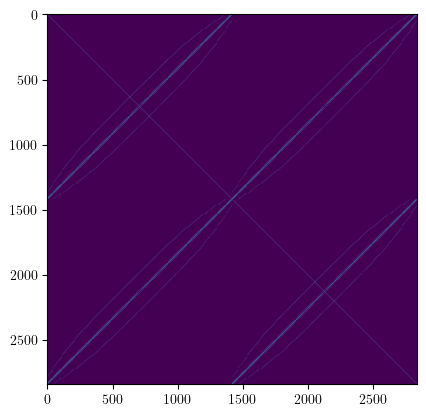

In [11]:
ATA_yes = np.abs(ATA_matrix)>1

plt.imshow(np.abs(ATA_yes))

np.diag(np.where(np.diag(ATA_matrix)<0))

In [12]:
row = ATA_matrix[0, :]
idxs = np.where(np.abs(row) > 0)
row[idxs]

array([ 1.43257804e+08, -1.35533103e+08, -3.47426976e-10, -2.84239602e+07])

In [13]:
reload(ewald)

n_images = 1

ctf_params, rotation_matrices, translations = simulator.random_sampling_scheme(n_images, grid_size, seed =0 )


k = volume_real.size
l = int(grid_size ** 2)
identity = np.eye(k)
A_r = np.zeros((l, k))
A_i = np.zeros((l, k))


(INFO) (ctf.py) (22-Apr-24 14:18:09) Image size (pix)  : 16
(INFO) (ctf.py) (22-Apr-24 14:18:09) A/pix             : 26.200000762939453
(INFO) (ctf.py) (22-Apr-24 14:18:09) DefocusU (A)      : 15301.099609375
(INFO) (ctf.py) (22-Apr-24 14:18:09) DefocusV (A)      : 14916.400390625
(INFO) (ctf.py) (22-Apr-24 14:18:09) Dfang (deg)       : 5.28000020980835
(INFO) (ctf.py) (22-Apr-24 14:18:09) voltage (kV)      : 300.0
(INFO) (ctf.py) (22-Apr-24 14:18:09) cs (mm)           : 2.700000047683716
(INFO) (ctf.py) (22-Apr-24 14:18:09) w                 : 0.07000000029802322
(INFO) (ctf.py) (22-Apr-24 14:18:09) Phase shift (deg) : 0.0


In [14]:
reload(ewald)

lam = ewald.volt_to_wavelength(300)

coords = ewald.batch_get_nearest_gridpoint_indices_ewald_sphere(rotation_matrices, image_shape, volume_shape, grid_size, voxel_size, lam)

slices = ewald.map_coordinates_on_ewald_sphere(vol, rotation_matrices, image_shape, volume_shape, grid_size, voxel_size, lam,  0)


In [15]:
print(slices.reshape(-1).shape)
print(vol.reshape(-1).shape)

(256,)
(4096,)


In [16]:
print(coords)

[[ 847 1103 1375 1631 1887 2143 2399 2671 2927 3183 3439 3694 3966 3966
  3965 3965  847 1119 1375 1631 1887 2143 2415 2671 2670 2926 3198 3453
  3709 3965 3964 3980  863 1119 1375 1375 1647 1902 2158 2414 2669 2941
  3197 3452 3708 3964 3980 3979  607  863 1118 1390 1646 1901 2157 2413
  2684 2940 3196 3452 3451 3723 3979 3978  606  862 1133 1389 1645 1900
  2172 2172 2428 2683 2939 3211 3466 3722 3978 3977  621  877  877 1132
  1388 1660 1915 2171 2427 2682 2954 3210 3465 3721 3977 3993  364  620
   876 1131 1403 1659 1914 2170 2426 2697 2953 2953 3209 3464 3736 3992
   363  619  891 1146 1402 1658 1658 1929 2185 2441 2696 2952 3224 3479
  3735 3991  362  378  634  890 1145 1401 1673 1928 2184 2440 2695 2967
  3223 3478 3734 3990  122  377  633  889 1144 1416 1672 1927 2183 2439
  2710 2710 2966 3222 3493 3749  121  376  632  904 1159 1415 1415 1671
  1942 2198 2454 2709 2965 3237 3492 3748  120  119  391  647  903 1158
  1414 1686 1941 2197 2453 2708 2980 3236 3491 3491  119  135  3

In [17]:
S = np.zeros((l, k))
coords = coords.reshape(-1)
S[np.arange(l), coords] = 1

In [18]:
def apply_A_r_sin(y, chi, flipped_idxs, kept_flipped_idxs, idxs, zero_idx, n):
    z = 0.5 * (np.sin(chi) * (y[idxs]))
    zf = 0.5 * (np.sin(chi) * (y[flipped_idxs] * kept_flipped_idxs))
    return z, zf

def apply_A_r_cos(y, chi, flipped_idxs, kept_flipped_idxs, idxs, zero_idx, n):
    z = 0.5 * (np.cos(chi) * (y[idxs + n]))
    zf = 0.5 * (np.cos(chi) * (y[n + flipped_idxs] * kept_flipped_idxs))
    return z, zf

def apply_A_i_sin(y, chi, flipped_idxs, kept_flipped_idxs, idxs, zero_idx, n):
    z = 0.5 * np.sin(chi) * y[idxs + n]
    zf = 0.5 * np.sin(chi) * (-y[n + flipped_idxs] * kept_flipped_idxs)
    z[zero_idx], zf[zero_idx] = y[zero_idx + n], y[zero_idx + n]
    return z, zf

def apply_A_i_cos(y, chi, flipped_idxs, kept_flipped_idxs, idxs, zero_idx, n):
    z = -0.5 * np.cos(chi) * (y[idxs])
    zf = 0.5 * np.cos(chi) * (y[flipped_idxs] * kept_flipped_idxs)
    z[zero_idx], zf[zero_idx] = y[zero_idx + n], y[zero_idx + n]
    return z, zf

def apply_A_r(image_shape, y, chi):
    n = image_shape[0] ** 2
    m = 2*n
    y = y.reshape(m,)
    idxs = np.arange(n)
    flipped_idxs = ewald.get_flipped_indices(image_shape)
    kept_flipped_idxs = (np.not_equal(flipped_idxs, -np.ones(n)))
    zero_idx = int(n/2 + (n**0.5)/2)
    C_1, C_1f = apply_A_r_sin(y, chi, flipped_idxs, kept_flipped_idxs, idxs, zero_idx, n)
    C_2, C_2f = apply_A_r_cos(y, chi, flipped_idxs, kept_flipped_idxs, idxs, zero_idx, n)
    return C_1 + C_1f + C_2 + C_2f

def apply_A_i(image_shape, y, chi):
    n = image_shape[0] ** 2
    m = 2*n
    y = y.reshape(m,)
    idxs = np.arange(n)
    flipped_idxs = ewald.get_flipped_indices(image_shape)
    kept_flipped_idxs = (np.not_equal(flipped_idxs, -np.ones(n)))
    zero_idx = int(n/2 + (n**0.5)/2)
    C_1, C_1f = apply_A_i_sin(y, chi, flipped_idxs, kept_flipped_idxs, idxs, zero_idx, n)
    C_2, C_2f = apply_A_i_cos(y, chi, flipped_idxs, kept_flipped_idxs, idxs, zero_idx, n)
    return C_1 + C_1f + C_2 + C_2f

In [19]:
def apply_A(image_shape, y, chi):
    n = image_shape[0] ** 2
    m = 2*n
    y = y.reshape(m,)
    idxs = np.arange(n)
    image_count = 1 
    z = np.zeros(m * image_count)
    for i in range(image_count):
        z_position_r = i * n
        z_position_i = z_position_r + int(z.size/2)
        z[z_position_r + idxs] = apply_A_r(image_shape, y, chi)
        z[z_position_i + idxs] = apply_A_i(image_shape, y, chi)
    return z


In [20]:
ATA = apply_A(image_shape, np.random.rand(l * 2), np.random.rand(l))

In [21]:
def apply_A_r(y, chi, flipped_idxs, kept_flipped_idxs, idxs, zero_idx, n):
    z = np.zeros(n)
    z[idxs] = np.sin(chi) * (y[idxs] + y[flipped_idxs] * kept_flipped_idxs)
    z[idxs] += np.cos(chi) * (y[idxs + n] + y[n + flipped_idxs] * kept_flipped_idxs)
    return 0.5 * z

def apply_A_i(y, chi, flipped_idxs, kept_flipped_idxs, idxs, zero_idx, n):
    z = np.zeros(n)
    z[idxs] = -np.cos(chi) * (y[idxs] - y[flipped_idxs] * kept_flipped_idxs) 
    z[idxs] += np.sin(chi) * (y[idxs + n] - y[n + flipped_idxs] * kept_flipped_idxs)
    z[zero_idx] = y[zero_idx + n]
    return 0.5 * z

def apply_A(image_shape, y, chi):
    n = image_shape[0] ** 2
    m = 2*n
    y = y.reshape(m,)
    idxs = np.arange(n)
    image_count = 1
    z = np.zeros(m * image_count)
    flipped_idxs = ewald.get_flipped_indices(image_shape)
    kept_flipped_idxs = (np.not_equal(flipped_idxs, -np.ones(n)))
    zero_idx = int(n/2 + (n**0.5)/2)
    for i in range(image_count):
        z_position_r = i * n
        z_position_i = z_position_r + int(z.size/2)
        current_chi = chi
        z[z_position_r + idxs] = apply_A_r(y, current_chi, flipped_idxs, kept_flipped_idxs, idxs, zero_idx, n)
        z[z_position_i + idxs] = apply_A_i(y, current_chi, flipped_idxs, kept_flipped_idxs, idxs, zero_idx, n)
    return z

In [22]:
image = S @ vol
image = np.concatenate((image.real, image.imag))
freqs = ftu.get_k_coordinate_of_each_pixel(image_shape, voxel_size=voxel_size, scaled=True)
chi = ewald.get_chi(freqs, ctf_params[0, 0], ctf_params[0, 1], ctf_params[0, 2], ctf_params[0, 3],ctf_params[0, 4],ctf_params[0, 5],ctf_params[0, 6],ctf_params[0, 7])

TypeError: dot_general requires contracting dimensions to have the same shape, got (4096,) and (16,).

In [ ]:
p = image.size 
I_p = np.eye(p)
A = np.zeros((p, p))

for i in range(p):
    A[:,i] = apply_A(image_shape, I_p[:, i], chi)


In [ ]:
d = np.diag(ATA_matrix)
d


In [ ]:
for i in range(k):
    if (i + 1) % 500 == 0:
        print('This iteration:', i + 1)
    x = identity[:, i]
    A_r[:, i], A_i[:, i] = ewald.ewald_sphere_forward_model(x, x, rotation_matrices, ctf_params, image_shape, volume_shape, voxel_size,'nearest_neighbor' )

In [ ]:
plt.imshow(np.abs(A_i[:, :])>0)
plt.figure()
plt.imshow(np.abs(A_i[:, :1000])>0)
plt.figure()
plt.imshow(np.abs(A_i[:, 1000:2000])>0)
plt.figure()
plt.imshow(np.abs(A_i[:, 2000:3000])>0)
plt.figure()
plt.imshow(np.abs(A_i[:, 3000:])>0)
plt.figure()


# plt.imshow(np.abs(A_i[:, :])>0)
# plt.figure()
# plt.imshow(np.abs(A_r.T @ A_r) > 0 )
# plt.figure()
# plt.imshow(np.abs(A_i.T @ A_i) > 0 )
# plt.figure()


In [ ]:
A = np.concatenate((A_r, A_i))
AT = A.T
ATA = AT @ A

idxs = np.where(np.abs(ATA) > 0)


plt.imshow(np.abs(ATA)>0)

In [ ]:
reload(ewald)
ATA_diagonal = np.zeros((m, m))

for i in range(m):
#     if (i + 1) % 500 == 0:
#         print('This iteration:', i + 1)
    x = np.array(I_m[:,i])
    ATA_diagonal[:,i] = ewald.diagonal_matvec_experiments(x, cryo, batch_size, "nearest", signal_variance, noise_variance)


In [ ]:
plt.imshow(np.abs(ATA_diagonal)>0)
plt.figure()
plt.imshow(np.abs(np.diag(np.diag(ATA_matrix)))>0)
np.linalg.norm(ATA_diagonal - np.diag(np.diag(ATA_matrix))) / np.linalg.norm(np.diag(np.diag(ATA_matrix)))
print(np.diag(np.diag(ATA_matrix)))
print(ATA_diagonal)

In [ ]:
reload(ewald)
x2, _ = ewald.solve_ewald_least_squares_2(cryo, batch_size, "nearest", signal_variance, noise_variance, ATA_matrix)

In [23]:
vol1_r, vol1_i = ewald.unvec_masked(x1, cryo.volume_shape, mask_size)
vol2_r, vol2_i = ewald.unvec_masked(x2, cryo.volume_shape, mask_size)

vol1 = (vol1_r + vol1_i * 1j).reshape(cryo.volume_shape)
vol2 = (vol2_r + vol2_i * 1j).reshape(cryo.volume_shape)

plt.imshow((np.sum(vol1,axis=0)).real)
plt.figure()
plt.imshow((np.sum(vol2,axis=0)).real)

NameError: name 'x2' is not defined

In [24]:
np.linalg.norm(x1 - x2) / np.linalg.norm(x1)

NameError: name 'x2' is not defined

array([ 1.43257804e+08, -1.35533103e+08,  3.47426976e-10, -2.84239602e+07])

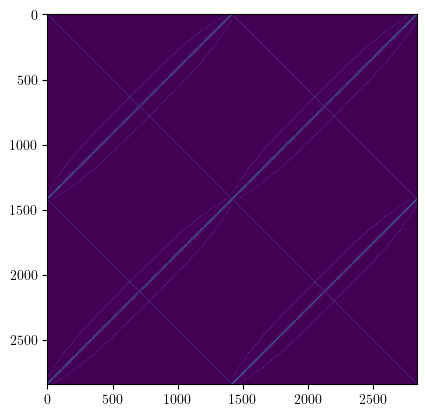

In [25]:
plt.imshow(np.abs(ATA_matrix)>0)

row = ATA_matrix[:, 0]
idxs1 = np.where(np.abs(row) > 0)
row[idxs1]

In [26]:
def diag(x):
    return np.diag(x)
d = np.linalg.inv(diag(diag(ATA_matrix)))

In [27]:
np.linalg.cond(d @ ATA_matrix)

12337.17459803391

In [28]:
d2 = ATA_matrix @ np.linalg.inv(diag(np.ones_like(ATA_matrix[0])))


In [23]:
np.linalg.cond(d2)

26874.363691420705

In [24]:
np.linalg.inv(ATA_matrix)

array([[9.89808490e-08, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.96684062e-08],
       [0.00000000e+00, 1.06730922e-07, 3.66904076e-08, ...,
        7.15211653e-09, 2.09988936e-08, 0.00000000e+00],
       [0.00000000e+00, 3.66904076e-08, 1.26289257e-07, ...,
        2.46252143e-08, 7.68328922e-09, 0.00000000e+00],
       ...,
       [0.00000000e+00, 7.15211653e-09, 2.46252143e-08, ...,
        1.27483624e-07, 3.65629703e-08, 0.00000000e+00],
       [0.00000000e+00, 2.09988936e-08, 7.68328922e-09, ...,
        3.65629703e-08, 1.05055923e-07, 0.00000000e+00],
       [1.96684062e-08, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.84948795e-08]])

In [25]:
eigs, eigenvecs = np.linalg.eig(ATA_matrix)

In [26]:
np.where(eigs < 0)

(array([], dtype=int64),)

In [27]:
x_experiment_real, x_experiment_imag = ewald.unvec_masked(x1, cryo.volume_shape, mask_size)

x_experiment = x_experiment_real + x_experiment_imag * 1j

In [28]:
np.linalg.norm(x_experiment - gt_vol) / np.linalg.norm(gt_vol)

0.0931000207909927

In [29]:
from recovar import core, utils, fourier_transform_utils
ftu = fourier_transform_utils.fourier_transform_utils(jax.numpy)


In [31]:
vol1 = ftu.get_idft3(gt_vol.reshape(volume_shape))

In [32]:
vol2 = ftu.get_idft3(x_experiment.reshape(volume_shape))

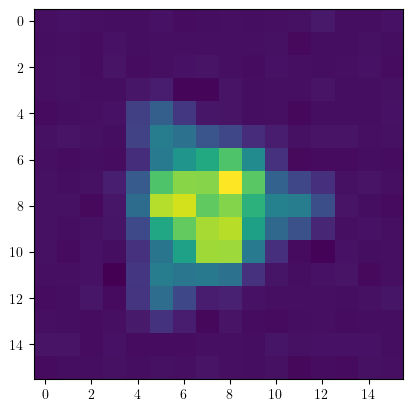

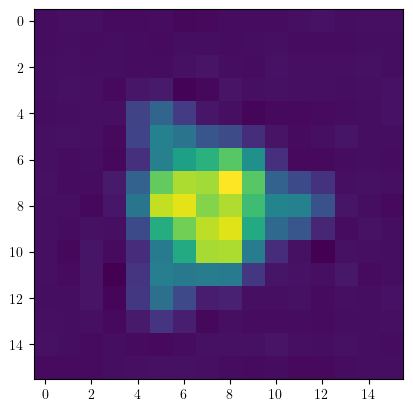

In [33]:
plt.imshow(np.sum(vol1.real, axis=0))
plt.figure()
plt.imshow(np.sum(vol2.real, axis=0))
